# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [121]:
USER_NAME = u"Дегтярев".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L1 регуляризацией с помощью метода  Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [268]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def sigmoid(z):
       return 1.0 / (1 + np.exp(-z))

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        self.const=C
        self.alpha = alpha
        self.max_epoch = max_epoch
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)#нормализуем данные
        X=np.c_[np.ones_like(X[:,0]),X]#искусственно создан дополнительный единичный столбец
        self.Total_loss=[]
        np.random.seed(seed=1)
        self.Beta = np.random.uniform(size=(X.shape[1],))#коэффициенты
        self.C = np.full((X.shape[1],), self.const)#Сделал так, потому что С для Beta[0] равен нулю
        self.C[0]=0
        N=X.shape[0]
        for epoch in range (1, self.max_epoch):
            np.random.seed(seed=epoch)
            shuffle_indexes=np.random.permutation(np.arange(N))
            X,y = X[shuffle_indexes], y[shuffle_indexes]#перемешиваем данные
            y_hat=sigmoid(X.dot(self.Beta))
            error=y_hat-y
            loss = np.sum(error ** 2)#считаем ошибку
            self.Total_loss.append(loss)#список ошибок по эпохам
            #обновляем коэффициенты
            gradient = X.T.dot(error) / N#считаю градиент на одном объекте
            L1=self.C*np.sign(self.Beta)#L1 регуляризация
            self.Beta+=-self.alpha*gradient - L1*(1./N)
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X=np.c_[np.ones_like(X[:,0]),X]#подготовили данные
        self.y_hat_proba=sigmoid(X.dot(self.Beta))
        labels = np.where(self.y_hat_proba >= .5, 1, 0)
        return labels
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        return self.y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

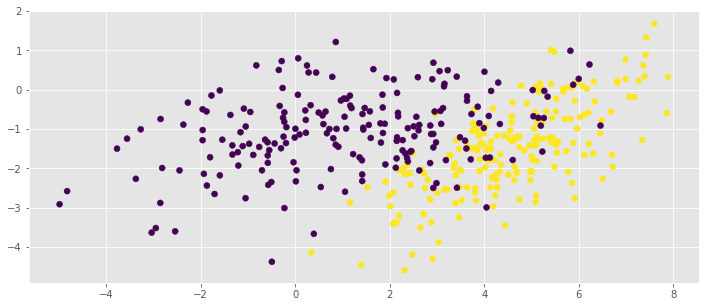

In [269]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [270]:
model = MySGDClassifier(alpha=1, max_epoch=100)
model.fit(X, y)
label=model.predict(X)

/Users/RomanDegtyarev/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((3,), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


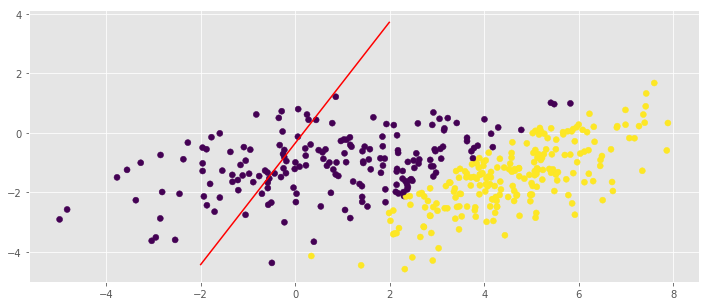

In [271]:
plt.scatter(X[:,0], X[:,1], c=label)
ox=np.arange(-2,2,.01)
Y = -(model.Beta[0] + (model.Beta[1] * ox)) / model.Beta[2]
plt.plot(ox,Y,"r-")

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

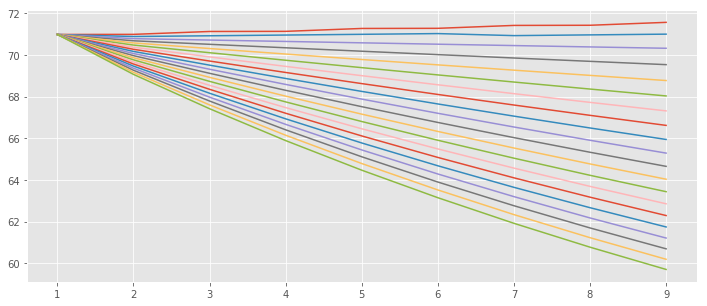

In [272]:
## Your Code Here
for alpha in np.arange(0.,0.2,0.01):
    model = MySGDClassifier(alpha=alpha)
    model.fit(X, y)
    total_epoch=np.arange(1,10)
    plt.plot(total_epoch,model.Total_loss)
plt.show()

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [364]:
# Загрузка данных целиком
df_list = []
for chunk in range(1,5):
    filepath = 'trainingData_tabular_chunk%d.csv' % chunk
    df_list.append(pd.read_csv(filepath, sep=','))

df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [365]:
df_data.shape

(500000, 45)

In [366]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [367]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [368]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.504702

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [369]:
df_data[['opponent_hero_card_id','player_hero_card_id']].head()

,opponent_hero_card_id,player_hero_card_id
gamestate_id,,
4687346,798,981
3270826,754,754
3189487,612,612
4098946,390,981
2661127,25,494


In [370]:
df1=df_data['opponent_hero_card_id']
df2=df_data['player_hero_card_id']

In [371]:
## Youd Code Here
s=set()
for i in df1:
    s.add(i)
for i in df1:
    s.add(i)

In [372]:
#все значения, которые могут быть
s=sorted(s)

In [373]:
names=[]
for item in s:
    names.append('opponent_hero_card_id_%d' %item)

In [374]:
names

['opponent_hero_card_id_25',
 'opponent_hero_card_id_326',
 'opponent_hero_card_id_390',
 'opponent_hero_card_id_494',
 'opponent_hero_card_id_612',
 'opponent_hero_card_id_754',
 'opponent_hero_card_id_798',
 'opponent_hero_card_id_981',
 'opponent_hero_card_id_1235']

In [375]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
emb = df_data.loc[:, ['opponent_hero_card_id']].replace({25: 0, 326: 1, 390: 2, 494: 3, 612: 4, 754: 5, 798: 6, 981: 7, 1235: 8}).values
emb_enc = encoder.fit_transform(emb)

In [376]:
df_data=df_data.join(pd.DataFrame(data=emb_enc, columns=names, index=df_data.index))

In [377]:
names=[]
for item in s:
    names.append('player_hero_card_id_%d' %item)

In [378]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
emb = df_data.loc[:, ['player_hero_card_id']].replace({25: 0, 326: 1, 390: 2, 494: 3, 612: 4, 754: 5, 798: 6, 981: 7, 1235: 8}).values
emb_enc = encoder.fit_transform(emb)

In [379]:
df_data=df_data.join(pd.DataFrame(data=emb_enc, columns=names, index=df_data.index))
df_data = df_data.drop('opponent_hero_card_id', 1)
df_data = df_data.drop('player_hero_card_id', 1)

In [380]:
df_data.T

gamestate_id,4687346,3270826,3189487,4098946,2661127,2993360,4378268,3774658,3956442,2958739,...,2135543,4652905,3851901,4928551,1547081,4649714,1089131,3457659,3503888,2886512
decision,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
turn,14.0,7.0,5.0,8.0,13.0,13.0,9.0,2.0,12.0,10.0,...,6.0,6.0,6.0,6.0,8.0,6.0,8.0,23.0,6.0,8.0
opponent_armor,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
opponent_hp,5.0,22.0,29.0,26.0,30.0,26.0,20.0,30.0,18.0,16.0,...,27.0,27.0,27.0,26.0,30.0,27.0,27.0,1.0,24.0,29.0
opponent_special_skill_used,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
opponent_crystals_all,10.0,6.0,4.0,7.0,10.0,10.0,9.0,1.0,10.0,9.0,...,5.0,5.0,5.0,5.0,7.0,5.0,7.0,10.0,5.0,7.0
opponent_crystals_current,10.0,6.0,1.0,7.0,1.0,3.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0
opponent_deck_count,11.0,19.0,22.0,17.0,12.0,10.0,17.0,25.0,13.0,16.0,...,21.0,21.0,20.0,20.0,18.0,20.0,18.0,1.0,21.0,17.0


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [292]:
## Youd Code Here
X, y =np.asarray(df_data.iloc[:,1:]), np.asarray(df_data.iloc[:,0])

In [293]:
model = MySGDClassifier()
model.fit(X, y)

/Users/RomanDegtyarev/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((60,), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


MySGDClassifier(C=array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
        alpha=0.01, max_epoch=10)

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [339]:
## Youd Code Here
filepath = 'testData_tabular.csv'
pd_test=pd.read_csv(filepath, sep=',')

In [340]:
names=[]
for item in s:
    names.append('opponent_hero_card_id_%d' %item)

In [341]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
emb = pd_test.loc[:, ['opponent.hero_card_id']].replace({25: 0, 326: 1, 390: 2, 494: 3, 612: 4, 754: 5, 798: 6, 981: 7, 1235: 8}).values
emb_enc = encoder.fit_transform(emb)

In [342]:
pd_test=pd_test.join(pd.DataFrame(data=emb_enc, columns=names, index=pd_test.index))

In [345]:
names=[]
for item in s:
    names.append('player_hero_card_id_%d' %item)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
emb = pd_test.loc[:, ['player.hero_card_id']].replace({25: 0, 326: 1, 390: 2, 494: 3, 612: 4, 754: 5, 798: 6, 981: 7, 1235: 8}).values
emb_enc = encoder.fit_transform(emb) 

In [346]:
pd_test=pd_test.join(pd.DataFrame(data=emb_enc, columns=names, index=pd_test.index))
pd_test = pd_test.drop('opponent.hero_card_id', 1)
pd_test = pd_test.drop('player.hero_card_id', 1)

In [360]:
X_test, y_test =np.asarray(pd_test.iloc[:,2:]), np.asarray(pd_test.iloc[:,1])

In [361]:
labels=model.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1])

In [357]:
X_test

array([[ 14.,   0.,   0., ...,   1.,   0.,   0.],
       [  7.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   3.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 23.,   0.,   0., ...,   1.,   0.,   0.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       [  8.,   0.,   1., ...,   0.,   0.,   0.]])

In [383]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [386]:
np.savetxt('high_score.txt', labels, delimiter=',', fmt='%d')